There are no points in the intersection.


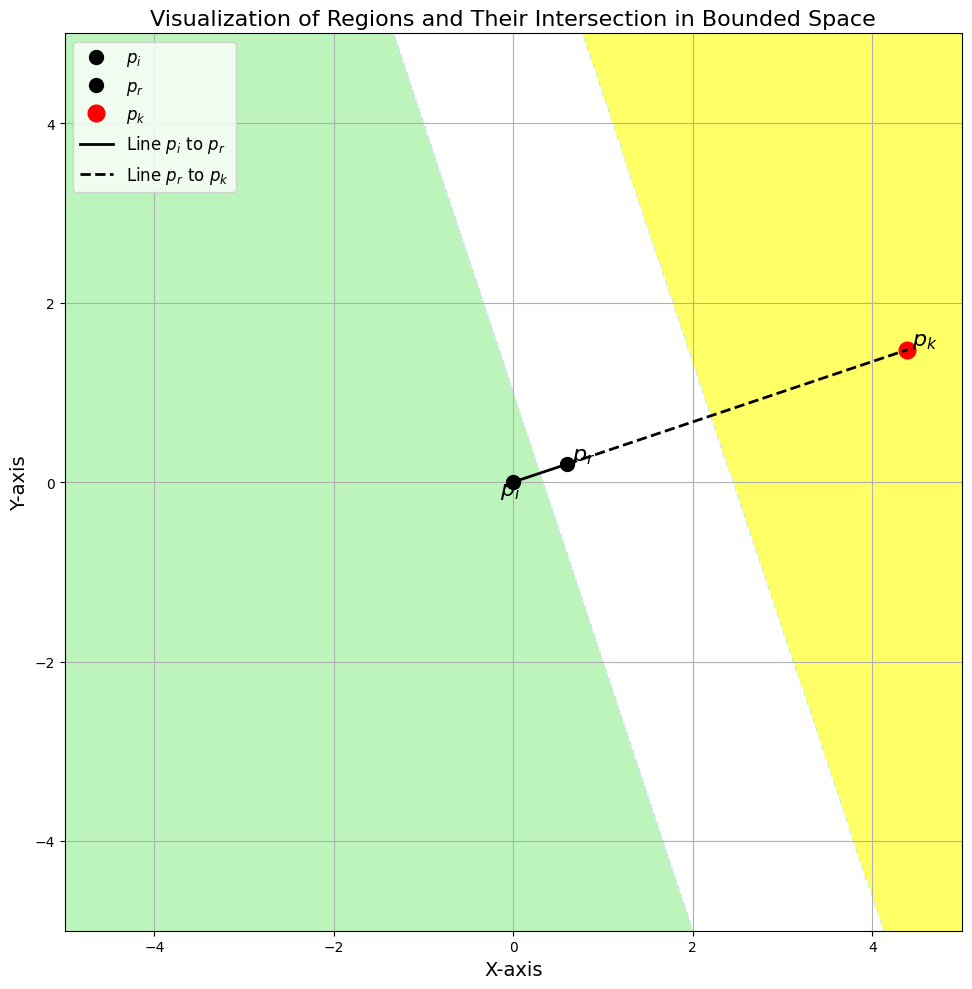

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the bounded space (expanded limits)
min_x, max_x = -5, 5  # Adjusted bounds
min_y, max_y = -5, 5

# Define points
p_i = np.array([0, 0])  # Place p_i at the origin
p_r = np.array([0.6, 0.2])  # Choose p_r within the bounded space

# Direction vector from p_i to p_r
v = p_r - p_i

# Create a perpendicular vector to v
v_perp = np.array([-v[1], v[0]])
v_perp = v_perp / np.linalg.norm(v_perp)  # Normalize

# Place p_k behind p_r along the line from p_i to p_r, slightly offset
delta = 4.0  # Increased distance beyond p_r along the line
epsilon = 1e-2  # Small offset to avoid collinearity

# Position p_k
p_k = p_r + delta * (v / np.linalg.norm(v)) + epsilon * v_perp

# Function to compute half-plane
def compute_half_plane(p1, p2, xx, yy):
    # Computes the half-plane where points are closer to p1 than to p2
    dist_p1 = (xx - p1[0])**2 + (yy - p1[1])**2
    dist_p2 = (xx - p2[0])**2 + (yy - p2[1])**2
    return dist_p1 < dist_p2

# Create a grid to evaluate the regions
grid_points = 600  # Higher resolution for better detail
xx, yy = np.meshgrid(np.linspace(min_x, max_x, grid_points), np.linspace(min_y, max_y, grid_points))

# Evaluate the regions
R_pki = compute_half_plane(p_k, p_i, xx, yy)   # Closer to p_k than to p_i
R_pir = compute_half_plane(p_i, p_r, xx, yy)   # Closer to p_i than to p_r

# Intersection of the regions
intersection = np.logical_and(R_pki, R_pir)

# Function to check for any points in the intersection
def check_intersection(intersection_grid):
    # If any value in the intersection grid is True, return True (there are points in the intersection)
    return np.any(intersection_grid)

# Check for points in the intersection
if check_intersection(intersection):
    print("There are points in the intersection.")
else:
    print("There are no points in the intersection.")

# Create a combined region map for visualization
regions = R_pir.astype(int) + 2 * R_pki.astype(int)

# Define colormap
cmap = ListedColormap(['white', 'lightblue', 'lightgreen', 'yellow'])

# Plotting
plt.figure(figsize=(10, 10))
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)

# Plot the regions
plt.imshow(regions, extent=(min_x, max_x, min_y, max_y), origin='lower', cmap=cmap, alpha=0.6, aspect='equal')

# Plot the points
plt.plot(p_i[0], p_i[1], 'ko', markersize=10, label='$p_i$')
plt.plot(p_r[0], p_r[1], 'ko', markersize=10, label='$p_r$')
plt.plot(p_k[0], p_k[1], 'ro', markersize=12, label='$p_k$')  # Red marker for better visibility

# Plot the lines connecting the points
plt.plot([p_i[0], p_r[0]], [p_i[1], p_r[1]], 'k-', linewidth=2, label='Line $p_i$ to $p_r$')
plt.plot([p_r[0], p_k[0]], [p_r[1], p_k[1]], 'k--', linewidth=2, label='Line $p_r$ to $p_k$')

# Annotate the points
plt.text(p_i[0]-0.15, p_i[1]-0.15, '$p_i$', fontsize=16)
plt.text(p_r[0]+0.05, p_r[1]+0.05, '$p_r$', fontsize=16)
plt.text(p_k[0]+0.05, p_k[1]+0.05, '$p_k$', fontsize=16)

# Labels and legend
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.title('Visualization of Regions and Their Intersection in Bounded Space', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

There are points in the intersection at epsilon = 2.325


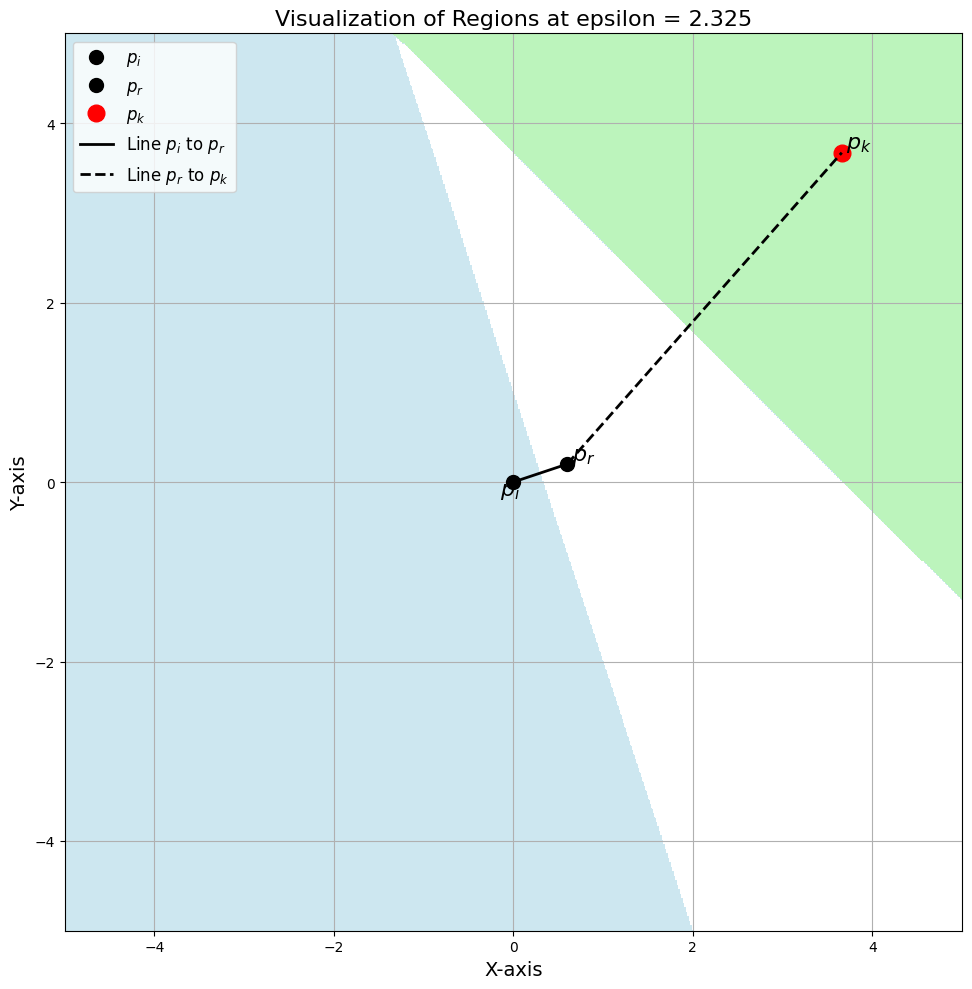

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the bounded space (expanded limits)
min_x, max_x = -5, 5  # Adjusted bounds
min_y, max_y = -5, 5

# Define points
p_i = np.array([0, 0])  # Place p_i at the origin
p_r = np.array([0.6, 0.2])  # Choose p_r within the bounded space

# Direction vector from p_i to p_r
v = p_r - p_i

# Create a perpendicular vector to v
v_perp = np.array([-v[1], v[0]])
v_perp = v_perp / np.linalg.norm(v_perp)  # Normalize

# Place p_k behind p_r along the line from p_i to p_r, slightly offset
delta = 4.0  # Increased distance beyond p_r along the line

# Function to compute half-plane
def compute_half_plane(p1, p2, xx, yy):
    # Computes the half-plane where points are closer to p1 than to p2
    dist_p1 = (xx - p1[0])**2 + (yy - p1[1])**2
    dist_p2 = (xx - p2[0])**2 + (yy - p2[1])**2
    return dist_p1 < dist_p2

# Create a grid to evaluate the regions
grid_points = 600  # Higher resolution for better detail
xx, yy = np.meshgrid(np.linspace(min_x, max_x, grid_points), np.linspace(min_y, max_y, grid_points))

# Initialize variables to store the result
intersection_found = False
epsilon_values = np.linspace(1e-2, 5, 10000)  # Epsilon values to try

for epsilon in epsilon_values:
    # Position p_k with the current epsilon
    p_k = p_r + delta * (v / np.linalg.norm(v)) + epsilon * v_perp

    # Evaluate the regions
    R_pki = compute_half_plane(p_k, p_i, xx, yy)   # Closer to p_k than to p_i
    R_pir = compute_half_plane(p_i, p_r, xx, yy)   # Closer to p_i than to p_r

    # Intersection of the regions
    intersection = np.logical_and(R_pki, R_pir)

    # Check for points in the intersection
    if np.any(intersection):
        print(f"There are points in the intersection at epsilon = {epsilon:.3f}")
        intersection_found = True
        break  # Exit the loop once intersection is found

if not intersection_found:
    print("No intersection found for the given range of epsilon.")

# If intersection is found, plot the regions
if intersection_found:
    # Create a combined region map for visualization
    regions = R_pir.astype(int) + 2 * R_pki.astype(int)

    # Define colormap
    cmap = ListedColormap(['white', 'lightblue', 'lightgreen', 'yellow'])

    # Plotting
    plt.figure(figsize=(10, 10))
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)

    # Plot the regions
    plt.imshow(regions, extent=(min_x, max_x, min_y, max_y), origin='lower', cmap=cmap, alpha=0.6, aspect='equal')

    # Plot the points
    plt.plot(p_i[0], p_i[1], 'ko', markersize=10, label='$p_i$')
    plt.plot(p_r[0], p_r[1], 'ko', markersize=10, label='$p_r$')
    plt.plot(p_k[0], p_k[1], 'ro', markersize=12, label='$p_k$')  # Red marker for p_k

    # Plot the lines connecting the points
    plt.plot([p_i[0], p_r[0]], [p_i[1], p_r[1]], 'k-', linewidth=2, label='Line $p_i$ to $p_r$')
    plt.plot([p_r[0], p_k[0]], [p_r[1], p_k[1]], 'k--', linewidth=2, label='Line $p_r$ to $p_k$')

    # Annotate the points
    plt.text(p_i[0]-0.15, p_i[1]-0.15, '$p_i$', fontsize=16)
    plt.text(p_r[0]+0.05, p_r[1]+0.05, '$p_r$', fontsize=16)
    plt.text(p_k[0]+0.05, p_k[1]+0.05, '$p_k$', fontsize=16)

    # Labels and legend
    plt.xlabel('X-axis', fontsize=14)
    plt.ylabel('Y-axis', fontsize=14)
    plt.title(f'Visualization of Regions at epsilon = {epsilon:.3f}', fontsize=16)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()